# Librarires

In [ ]:
import numpy as np
import random

from sklearn.datasets import fetch_california_housing

# Load Dataset

In [ ]:
data = fetch_california_housing()
X = data.data
sample_numbers = 4000
indices = np.random.choice(X.shape[0], sample_numbers, replace=False)
x_data = X[indices]

# Implement KMeans algorithm (do not use any libraries and implement it from scratch)

In [ ]:
def my_kmeans(X, k, max_iters=100):
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    for _ in range(max_iters):

        labels = np.argmin(np.linalg.norm(X[:, np.newaxis] - centroids, axis=2), axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.array_equal(new_centroids, centroids):
            break
        centroids = new_centroids
    return labels, centroids



# Use elbow method and silhouette method to choose optimal cluster numbers

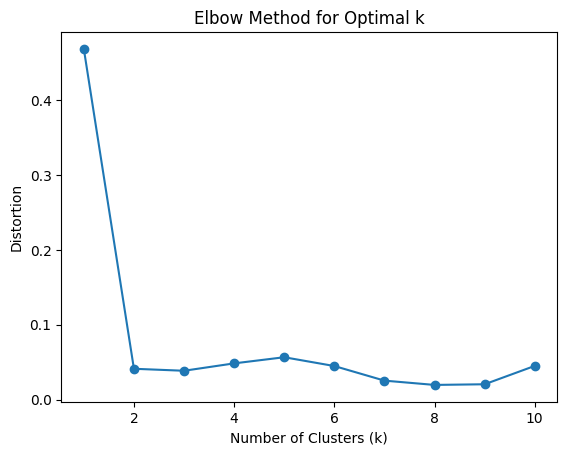

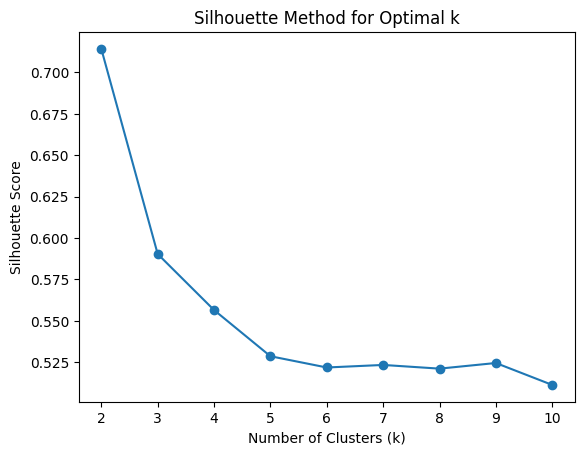

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

X = x_data
X_1 = StandardScaler().fit_transform(X)

distortions = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    labels, _ = my_kmeans(X_1, k)
    distortion = np.mean(np.min(np.linalg.norm(X_1 - _[labels], axis=1)) ** 2)
    distortions.append(distortion)

plt.plot(range(1, max_clusters + 1), distortions, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

silhouette_scores = []

for k in range(2, max_clusters + 1):
    labels, _ = my_kmeans(X, k)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Compare your k means algorithm with sklearn k means algorithm (compare it with both elbow and silhouette method)

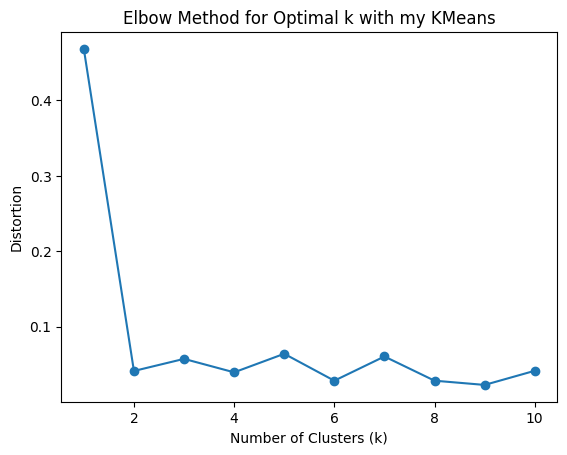

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

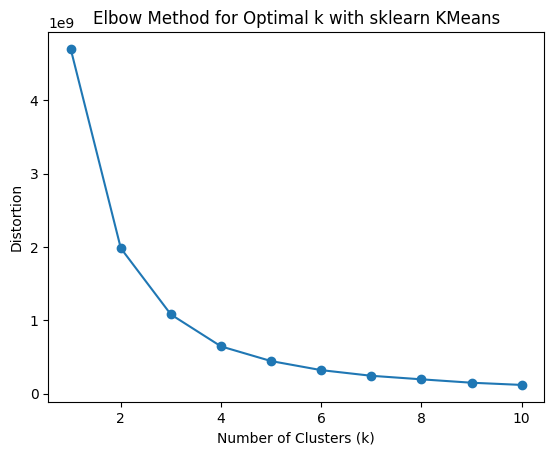

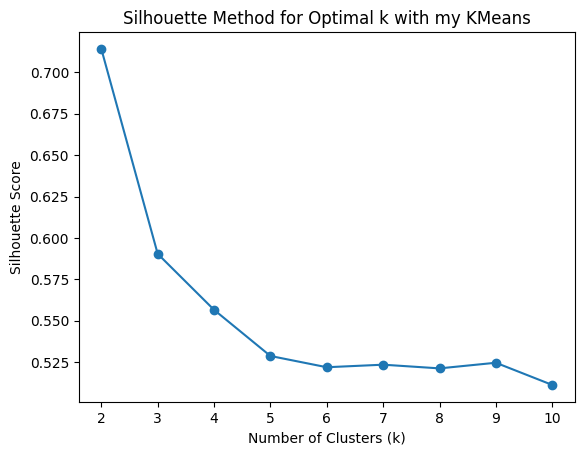

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

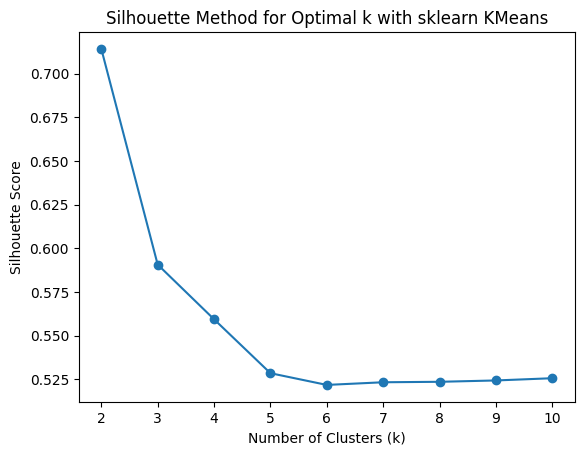

In [ ]:
from sklearn.cluster import KMeans

#ELBOW

# my kmeans:

X = x_data
X_1 = StandardScaler().fit_transform(X)

distortions1 = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    labels, _ = my_kmeans(X_1, k)
    distortion = np.mean(np.min(np.linalg.norm(X_1 - _[labels], axis=1)) ** 2)
    distortions1.append(distortion)

plt.plot(range(1, max_clusters + 1), distortions1, marker='o')
plt.title('Elbow Method for Optimal k with my KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

#sklearn kmeans:

distortions2 = []
max_clusters = 10

for k in range(1, max_clusters + 1):
    kmeans_sk_for_elbow = KMeans(n_clusters=k).fit(X)
    distortions2.append(kmeans_sk_for_elbow.inertia_)

plt.plot(range(1, max_clusters + 1), distortions2, marker='o')
plt.title('Elbow Method for Optimal k with sklearn KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.show()

#=====================================================================================================


#sillhouette

# my kmeans:

silhouette_scores1 = []

for k in range(2, max_clusters + 1):
    labels, _ = my_kmeans(X, k)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores1.append(silhouette_avg)

plt.plot(range(2, max_clusters + 1), silhouette_scores1, marker='o')
plt.title('Silhouette Method for Optimal k with my KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()


#sklearn kmeans:

silhouette_scores2 = []

for k in range(2, max_clusters + 1):
    kmeans_sk_for_silhouette = KMeans(n_clusters=k).fit(X)
    labels = kmeans_sk_for_silhouette.labels_
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores2.append(silhouette_avg)

plt.plot(range(2, max_clusters + 1), silhouette_scores2, marker='o')
plt.title('Silhouette Method for Optimal k with sklearn KMeans')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()



### what is the optimal cluster number based on your custom kmeans algorithm and sklearn kmeans algorithm? if answer is different based on each algorithm then explain difference

I got k=2 for my KMeans elbow but in sklearn answer k=3 was obtained
I got k=2 for both my KMeans sillhouette and sklearn sillhouette.

The differences in the optimal cluster number between a custom implementation of KMeans and the sklearn KMeans algorithm in Python could be related to variations in centroid initialization methods, convergence criteria, randomness in initialization, and performance optimizations.

### would you prefer elbow method for determining optimal cluster number or silhouette method?
#### I prefer silhouette method because in elbow method sometimes it's hard to say where is the elbow point but silhouette method is more deterministic rather than elbow method

In [ ]:
I prefer silhouette method because first: if we have complicated and noisy dataset or
we have duplicate data in our train set the elbow method wont work well.
second: personally, it is difficult for me to find the elbow point in its plot.